# Project case: Apprentice Chef
## Regression-based machine learning project using supervised learning techniques

1. <b>Project assigned by:</b>  Chase Kusterer
2. <b>Project completed by:</b> Arseniy Barmin
3. <b>Project duration:</b> January 2020 - February 2020

Apprentice Chef, Inc. is an innovative company with a unique spin on cooking at home. Developed for the busy professional that has little to no skills in the kitchen, they offer a wide selection of daily-prepared gourmet meals delivered directly to your door. Each meal set takes at most 30 minutes to finish cooking at home and also comes with Apprentice Chef's award-winning disposable cookware (i.e. pots, pans, baking trays, and utensils), allowing for fast and easy cleanup. Ordering meals is very easy given their user-friendly online platform and mobile app.




------

### Case context

After 3 years serving customers across the San Francisco Bay Area, the executives at Apprentice Chef have come to realize that over 90% of their revenue comes from customers that have been ordering meal sets for 12 months or less. Given this information, they would like to better understand how much revenue to expect from each customer within their first year of orders. 

Thus, they have hired me on a full-time contract to:
1. Analyze their data
2. Develop my top insights
3. Build a machine learning model to predict revenue over the first year of each customer’s life cycle.

In order to appropriately prepare the data for this analysis, the data science team at Apprentice Chef has queried, sampled, and verified a dataset of approximately 2,000 customers. Each customer met at least one of the following criteria:

1. At least one purchase per month for a total of 11 of their first 12 months
2. At least one purchase per quarter and at least 15 purchases throughout their first year

The data science team assures me that their dataset engineering techniques are statistically sound and represent the true picture of Apprentice Chef’s customers. To help me in my task, Apprentice Chef, Inc. has provided me with the dataset and additional information about the company.

___

### The business question

Build a machine learning model to predict how much revenue to expect over the first year of each customer's life cycle.

___

### Libraries and file upload
Before I begin and throughout this project, I will be adding the libraries I will be using in the code block below. First, I always upload the following 3 libraries before beginning my work:

1. <b>Pandas as pd </b> for essential data science tools
2. <b>Matplotlib.pyplot as plt</b> for essential graphical output
3. <b>Seaborn as sns</b> for enhanced visualizations

The rest of the libraries I will need throughout this analysis will be added to this code block one by one.

In [41]:
# LIBRARIES #

import pandas                   as pd     # data science essentials
import matplotlib.pyplot        as plt    # essential graphical output
import seaborn                  as sns    # enhanced graphical output

import statsmodels.formula.api  as smf                        # regression modeling
from sklearn.model_selection    import train_test_split       # importing train_test_split
from sklearn.neighbors          import KNeighborsRegressor    # KNN for Regression
from sklearn.preprocessing      import StandardScaler         # standard scaler
from sklearn.linear_model       import LinearRegression       # importing linear regression
import sklearn.linear_model                                   # importing sklearn
from sklearn.tree               import DecisionTreeRegressor  # importing Decision Tree Regressor

Now that the libraries are loaded, I will read in the Excel file from the working directory into Python. In addition, I will specify pandas print options to ensure that I will be able to output and view information on all variables, rather than first several and last several.

In [42]:
# FILE UPLOAD #

# Reading in the dataset into Python
file = 'Apprentice_Chef_Dataset.xlsx'  # specifying file name
my_df = pd.read_excel(file)            # reading the file into Python

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

___

### Initial data exploration
Now that the file is loaded, I will next analyze the structure of my data, its variable types, and other information to gain first impression of the dataset.

In [43]:
# FIRST IMPRESSION #
my_df.info()  # learning about the infomration I have on each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

There are 2 important insights I am observing:
1. <b> Dataset contains 4 categorical variables </b>\
Because machine learning models only accept numeric variables, I will have to decide how to treat the 4 variables of class "object"


2. <b> Dataset contains missing values </b>\
The "FAMILY_NAME" variable contains 1899 observations, whereas other columns contain 1946. Another prerequisite for machine learning models to work properly is to have a dataset with no missing values. Therefore, I will have to analyze these missing values to identify the best way to treat them.

I will consider what to do with the 4 variables of class "object" later. Next, I would like to analyze the missing values in the dataset. For sanity check, in the next code block I want to see the number of missing values per variable in my dataset.

In [44]:
# MISSING VALUES ANALYSIS #
my_df.isnull().sum()      # analyzing the number of missing values per variable in the dataset

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

For sanity check, I verified I was correct; only the "FAMILY_NAME" variable contains missing values. My business question is to <b>predict revenue over the first year of each customer’s life cycle</b>. 

My common sense tells me that a customer's family name is irrelevant to predicting revenue. However, I also acknowledge that missing values can potentially reveal valuable information later in the analysis. Therefore, I will create a new variable to flag my missing values.

In [45]:
# creating a for loop to flag missing values
for col in my_df:
    if my_df[col].isnull().astype(int).sum() > 0:
        my_df['m_' + col] = my_df[col].isnull().astype(int)

# checking to see if the solution worked
my_df

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,0
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,Yandry,yandry@yahoo.com,Yandry,Yandry,38,9,6,9,118.50,1,1,0,1,6,2,9,4,3,0,0,20,117.7,4,0,3,12,98,0
1942,1432.0,0,Yorkel,yorkel@gmail.com,Yorkel,Yorkel,47,8,4,8,105.30,0,0,0,1,5,3,6,0,2,0,0,20,98.1,3,0,3,13,0,0
1943,623.0,0,Young Henly,young.henly@gmail.com,Young,Henly,14,6,11,1,90.81,1,1,0,1,6,1,12,0,1,0,0,30,86.4,3,1,2,18,0,0
1944,899.0,0,Ysilla,ysilla@protonmail.com,Ysilla,Ysilla,15,4,12,6,97.22,1,0,0,0,6,2,52,4,3,0,0,20,86.9,1,0,2,17,0,0


After running the loop to flag missing values by creating a new column using the "m_column_name" format, I printed my results for sanity check. A new column flagging missing values was created, and as the last step I will run another for loop to see if all missing values are accounted for.

In [46]:
# making a more formal check
a = my_df.isnull().sum().sum()
b = my_df.iloc[ :, -1: ].sum().sum()

if a == b:
    print('\nAll missing values are accounted for')
else:
    print('\nSome missing values may be unaccounted for, please audit')


All missing values are accounted for


My for loop states that all missing values have been accounted for.

I treated all missing values by flagging them using new variables, but the dataset still contains 47 missing values. Because all the missing values are located in the "FAMILY_NAME" column, I will drop them all. My business question is to <b>predict revenue over the first year of each customer’s life cycle</b>. Hence, my common sense tells me that it is illogical to hypothesize that a person's family name can help predict revenue. 

Conclusively, I will next drop the missing values from our dataset. 

In [47]:
# creating a Data Frame after dropping missing values to from original data 
my_df_dropped = my_df.dropna() 

For sanity check, I next want to make sure my dataset contains no more missing values.

In [48]:
# Counting the number of missing values in the entire dataset
my_df_dropped.isnull().sum().sum()

0

Now that I am assured my dataset contains no missing values, I will next analyze the descriptive statistics of each numeric variable.

In [49]:
# FIRST IMPRESSION #
my_df_dropped.describe().round(2) # describing and analyzing each quantitative column

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME
count,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.0
mean,2109.66,0.68,74.77,4.91,6.98,5.37,99.86,0.88,1.41,0.17,0.72,5.52,1.48,11.35,1.49,2.97,0.36,0.11,35.60,150.67,4.44,0.61,2.79,13.51,106.04,0.0
std,1140.78,0.47,55.43,2.50,2.28,3.04,62.91,0.33,1.55,0.43,0.45,0.58,0.53,13.61,2.32,2.74,0.48,0.32,26.58,49.75,1.56,0.64,0.76,2.34,180.79,0.0
min,131.00,0.00,11.00,1.00,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00,0.0
25%,1350.00,0.00,39.00,3.00,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.35,3.00,0.00,2.00,12.00,0.00,0.0
50%,1745.00,1.00,60.00,5.00,7.00,5.00,94.12,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00,0.0
75%,2670.00,1.00,95.00,7.00,8.00,8.00,117.57,1.00,2.00,0.00,1.00,6.00,2.00,14.00,3.00,4.00,1.00,0.00,60.00,173.80,5.00,1.00,3.00,15.00,174.00,0.0
max,8793.75,1.00,493.00,19.00,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00,0.0


Based on the output, I notice several interesting observations:

1. <b>There difference between revenue generated by the top 25% of customers and the rest is very large.</b>

75% of Apprentice Chef's customers generate between \\$131 and \\$2670 in revenue. The top 25% of customers generate between \\$2670 and \\$8800. This is a big range, and based on this information, I assume that we don't only have individual consumers, but may also have corporate consumers to whom we cater large orders. If this would be a real-world situation, I would next study our customer base in details. Because this is a project, having this assumption in mind is already a notable observation. 

2. <b>There difference between total meals ordered by the top 25% of customers and the rest is exponential.</b>

Since this is a project and not a real-world work, I don't have the resources to analyze Apprentice Chef's customer base in details. However, this observation solidifies my first assumption based on distribution of values in the "REVENUE" column; the company likely has individual and corporate customers. The mean for total meals ordered is 75, and the 3rd quartile of customers orders around 95 meals. The top 25% of customers order up to 493 meals; a huge increase compared to the 75th percentile of customers. Conclusively, I now strongly believe  we both individuals and businesses.

3. <b>Numeric variables vary in their shape.</b>

Some numeric variables greatly range in values, because some are continuous, and some are binary. This means that certain columns communicate range in values, and some may communicate a <i> Yes or No </i> kind of information. Therefore, it is important to take a closer look at each column to enhance my domain knowledge, and to also explore the metadata.

4. <b>This dataset is rich with outliers.</b>

As mentioned, the "REVENUE" and "TOTAL_MEALS_ORDERED" variables substantially differ in distribution of their values between the top 25% of customers and the rest. These 2 columns, along with several others, indicate the presence of outliers. This is an important insight, because outliers can potentially have a strong influence on predicting revenue. This insight directs me to the next phase of my analysis - outlier analysis. 

Before I proceed analyzing outliers, I will first state my hypotheses based on what I learned so far. 

___

### Hypothesis

Now that I've done my initial data exploration, I developed several hypotheses I will be testing in this project:

1. <b>Upper outliers in the TOTAL_MEALS_ORDERED column will be prove to be statistically significant to include in my machine learning models</b>

The 75th percentile of customers order, on average, up to 95 meals. However, there is an exponential increase in the top 25% of customers; from 95 to 493. This tells me that there are outliers in this column that will influence the revenue significantly. Therefore, I am interested to see how significant upper outliers in this column will be in predicting revenue.

2. <b>The scale-sensitive machine learning model will prove to be the best model</b>

From initial data exploration, I notice that there are many numeric variables that vary in scale. For example, the variable CROSS_SELL_SUCCESS varies in values between 0 and 1, whereas the variable AVG_TIME_PER_SITE_VISIT varies between 0 and 1645. This tells me that certain algorithms may not take into account the different scalings, and there are certain machine learning models that require scaled data to perform effectively. Therefore, I believe that a machine learning model that requires scaling will perform best. 


___

### Feature engineering - Outlier analysis

Before beginning my outlier analysis, I first want to make sure that I save my file back to Excel in my working directory. I concluded my data exploration, made certain adjustments to dataset, so it is a good practice to safe my work frequently as I progress further.

In [50]:
# SAVING DATASET WITH DROPPED MISSING VALUES
my_df_dropped.to_excel('Apprentice_Chef_Dataset_dropped.xlsx', index = False)

Outlier analysis is an important step in preparing my data for machine learning. 

Later in this project, I will be analyzing the relationship between my response variable - REVENUE - and other variables from the dataset. To do this well, I will create several new columns to flag outliers that are present in existing columns. Currently, many variables have a certain range where most values are located. The minority of values located to the left and to the right of that majority range is where outliers are found.

Outliers can communicate important information, and can potentially prove to be statistically significant in predicting revenue just by themselves. Therefore, it is a good practice to place lower and upper outliers in their own columns. That way, when I analyze statistical significance of each column against my response variable - REVENUE - outliers will be analyzed as thoroughly as the ranges that contain majority values. Otherwise, when outliers and majority values are analyzed together for statistical significance, outliers may not be considered as equally. This means I may miss out on considering important information, which I wish to avoid.

Soon, I will create a code to visualize the distribution of values for each numeric variable. Before I do that, I will show my approach to analyzing one plot from the dataset for possible lower and upper outliers. Below is the code that visualizes the distribution of values for my example variable - AVG_CLICKS_PER_VISIT.

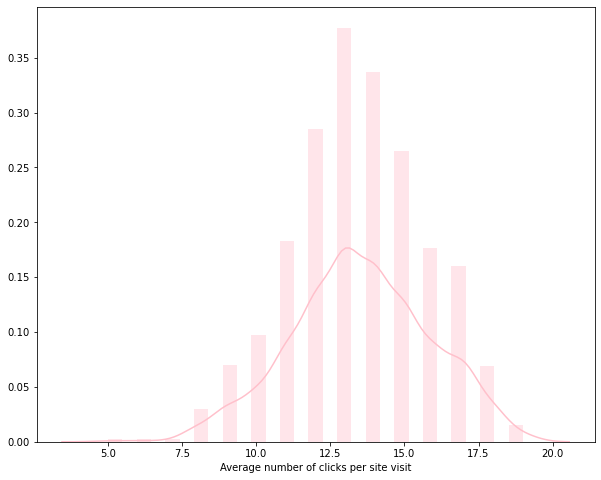

In [51]:
# Example plot - avg_clicks_per_visit
fig, ax = plt.subplots(figsize = (10, 8))
sns.distplot(my_df_dropped['AVG_CLICKS_PER_VISIT'], bins = 'fd', color = 'pink')
plt.xlabel('Average number of clicks per site visit')
plt.show()

I will use the same approach to analyze each numeric variable for possible lower and upper outliers. Before I plot all numeric variables, I will show my thought process of analyzing an example variable - AVG_CLICKS_PER_VISIT.

<b>Example variable analysis - AVG_CLICKS_PER_VISIT</b>

The distribution of values in this variable appears to have the majority of values in the range between around 10 and around 18. Therefore, I intuitively mark this range as the majority range with values [10:18]. There are not nearly as many values located to the left and to the right of this range. Therefore, I identufy the region [0:10) as a region containing lower outliers, and the region (18:19] as a region containing upper outliers. To summarize

- Range [10:18] is the majority range I subjectively identify 
- Range [0:10) is my left (lower) outlier range I subjectively identify
- Range (18:19] is my right (upper) outlier range I subjectively identify

Using the approach described on an example variable above, I will analyze the remaining plots in a similar fashion. The code block below creates a plot to visualize distribution of values for each numeric variable.

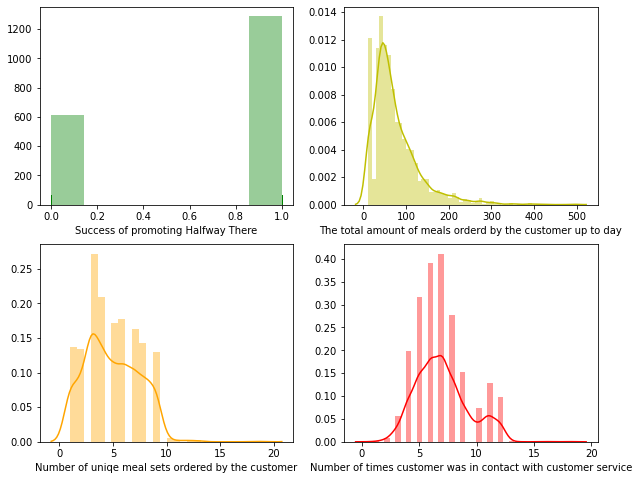

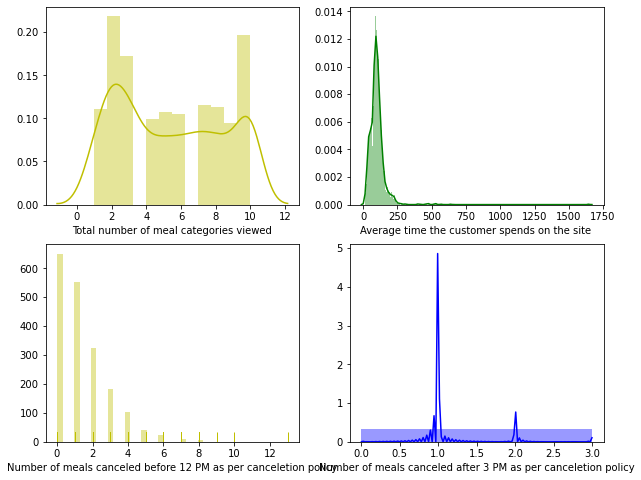

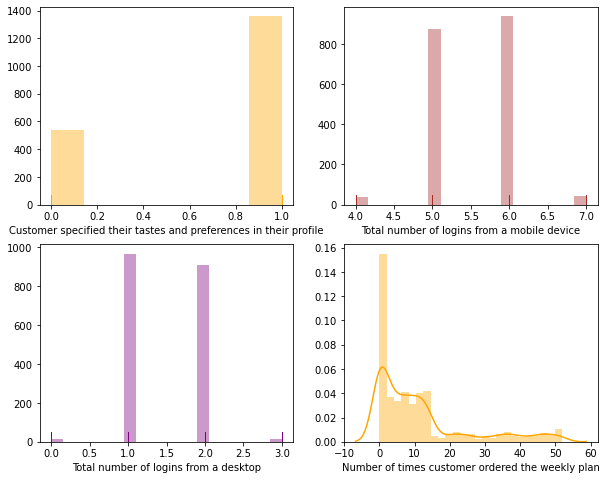

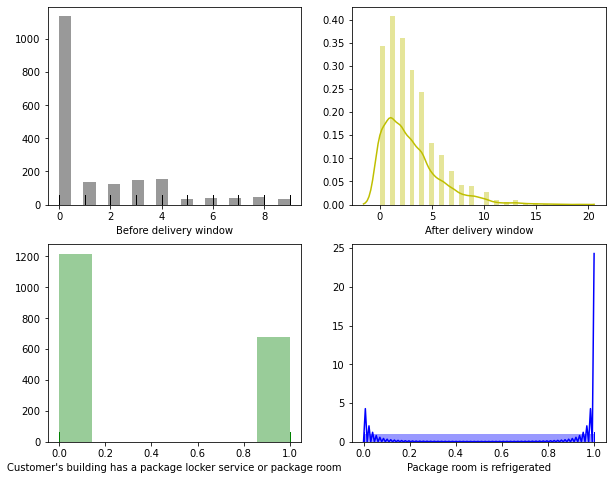

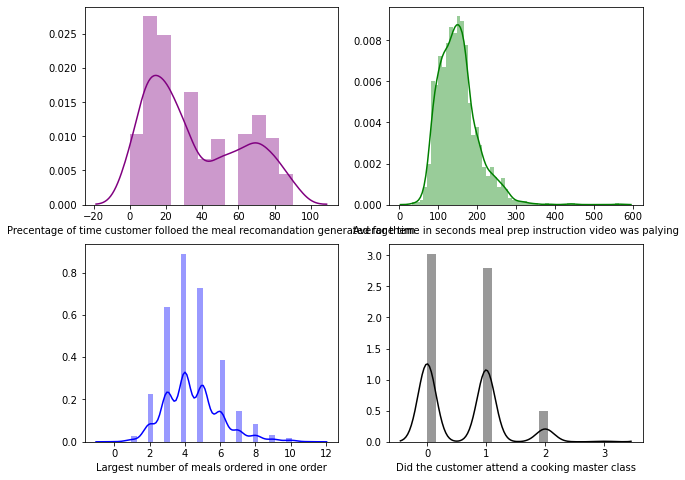

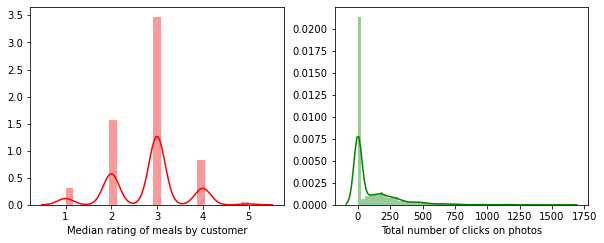

In [52]:
# OUTLIER ANALYSIS

# Plot 1 - cross_sell_success
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot (2, 2, 1)
sns.distplot(my_df_dropped['CROSS_SELL_SUCCESS'], bins = 'fd', kde = False, rug = True, color = 'g')
plt.xlabel('Success of promoting Halfway There')

# Plot 2 - total_meals_ordered
plt.subplot(2, 2, 2)
sns.distplot(my_df_dropped['TOTAL_MEALS_ORDERED'], bins = 'fd', color = 'y')
plt.xlabel('The total amount of meals orderd by the customer up to day')

#Plot 3 - unique_meals_purch
plt.subplot(2, 2, 3)
sns.distplot(my_df_dropped['UNIQUE_MEALS_PURCH'], bins = 'fd', color = 'orange')
plt.xlabel('Number of uniqe meal sets ordered by the customer')

#Plot 4 - contacts_w_customer_service
plt.subplot(2, 2, 4)
sns.distplot(my_df_dropped['CONTACTS_W_CUSTOMER_SERVICE'], bins = 'fd', color = 'r')
plt.xlabel('Number of times customer was in contact with customer service')

#Plot 5 - product_categories_viewed
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_df_dropped['PRODUCT_CATEGORIES_VIEWED'], bins = 'fd', color = 'y')
plt.xlabel('Total number of meal categories viewed')

#Plot 6 - avg_time_per_site_visit
plt.subplot(2, 2, 2)
sns.distplot(my_df_dropped['AVG_TIME_PER_SITE_VISIT'], bins = 'fd', color = 'g')
plt.xlabel('Average time the customer spends on the site ')

#Plot 7 - cancellations_before_noon
plt.subplot(2, 2, 3)
sns.distplot(my_df_dropped['CANCELLATIONS_BEFORE_NOON'], bins = 'fd', kde = False, rug = True, color = 'y')
plt.xlabel('Number of meals canceled before 12 PM as per canceletion policy')

#Plot 8 - cancellations_after_noon
plt.subplot(2, 2, 4)
sns.distplot(my_df_dropped['CANCELLATIONS_AFTER_NOON'], bins = 'fd', color = 'blue')
plt.xlabel('Number of meals canceled after 3 PM as per canceletion policy')

#Plot 9 - tastes_and_preferences
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_df_dropped['TASTES_AND_PREFERENCES'], bins = 'fd', kde = False, rug = True, color = 'orange')
plt.xlabel('Customer specified their tastes and preferences in their profile')

#Plot 10 - mobile_logins
plt.subplot(2, 2, 2)
sns.distplot(my_df_dropped['MOBILE_LOGINS'], bins = 'fd', kde = False, rug = True, color = 'brown')
plt.xlabel('Total number of logins from a mobile device')

#Plot 11 - pc_logins
plt.subplot(2, 2, 3)
sns.distplot(my_df_dropped['PC_LOGINS'], bins = 'fd', kde = False, rug = True, color = 'purple')
plt.xlabel('Total number of logins from a desktop')

#Plot 12 - weekly_plan
plt.subplot(2, 2, 4)
sns.distplot(my_df_dropped['WEEKLY_PLAN'], bins = 'fd', color = 'orange')
plt.xlabel('Number of times customer ordered the weekly plan')

#Plot 13 - early_deliveries
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_df_dropped['EARLY_DELIVERIES'], bins = 'fd', kde = False, rug = True, color = 'black')
plt.xlabel('Before delivery window')

#Plot 14 - late_deliveries
plt.subplot(2, 2, 2)
sns.distplot(my_df_dropped['LATE_DELIVERIES'], bins = 'fd', color = 'y')
plt.xlabel('After delivery window')

#Plot 15 - package_locker
plt.subplot(2, 2, 3)
sns.distplot(my_df_dropped['PACKAGE_LOCKER'], bins = 'fd', kde = False, rug = True, color = 'g')
plt.xlabel("Customer's building has a package locker service or package room")

#Plot 16 - refrigerated_locker
plt.subplot(2, 2, 4)
sns.distplot(my_df_dropped['REFRIGERATED_LOCKER'], bins = 'fd', rug = True, norm_hist = False, color = 'blue')
plt.xlabel('Package room is refrigerated')

#Plot 17 - followed_recommendations_pct
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_df_dropped['FOLLOWED_RECOMMENDATIONS_PCT'], bins = 'fd', color = 'purple')
plt.xlabel('Precentage of time customer folloed the meal recomandation generated for them')

#Plot 18 - avg_prep_vid_time
plt.subplot(2, 2, 2)
sns.distplot(my_df_dropped['AVG_PREP_VID_TIME'], bins = 'fd', color = 'g')
plt.xlabel('Average time in seconds meal prep instruction video was palying')

#Plot 19 - largest_order_size
plt.subplot(2, 2, 3)
sns.distplot(my_df_dropped['LARGEST_ORDER_SIZE'], bins = 'fd', color = 'blue')
plt.xlabel('Largest number of meals ordered in one order')

#Plot 20 - master_classes_attended
plt.subplot(2, 2, 4)
sns.distplot(my_df_dropped['MASTER_CLASSES_ATTENDED'], bins = 'fd', color = 'black')
plt.xlabel('Did the customer attend a cooking master class')

#Plot 21 - median_meal_rating
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_df_dropped['MEDIAN_MEAL_RATING'], bins = 'fd', color = 'red')
plt.xlabel('Median rating of meals by customer')

#Plot 22 - total_photos_viewed
plt.subplot(2, 2, 2)
sns.distplot(my_df_dropped['TOTAL_PHOTOS_VIEWED'], bins = 'fd', color = 'g')
plt.xlabel('Total number of clicks on photos')
plt.show()

The output above shows the distribution of values for each numerical variable. Some of the variables are binary, and some are continuous. Many variables have lower and upper outliers. 

I have already described my approach to analyzing outliers for each variable earlier. Now that I have visually identified outliers for all variables, I will answer an important question - how did I determine my outliers?

<b>How to identify outliers?</b>

The beauty of analyzing outliers is that there is no perfect method to use. In other words, every person may identify outliers at different values. In the above example, I used my common sense to determine specific value ranges for my outliers. Another data scientist may identify outliers at differently, because every person has their own interpretation of where the majority range and outlier ranges border. Therefore, as long as you identify outliers using logic, others are very unlikely to question your approach.

Now that I determined my outliers, I will flag them at specific thresholds in the next code block.

In [53]:
# Setting outlier thresholds

total_meals_ordered_hi = 150
unique_meals_purch_hi = 10
contacts_w_customer_service_lo = 3
contacts_w_customer_service_hi = 10
avg_time_per_site_visit_hi = 180
cancellations_before_noon_hi = 3
cancellations_after_noon_hi = 1
mobile_logins_lo = 4
mobile_logins_hi = 7
pc_logins_lo = 0
pc_logins_hi = 3
weekly_plan_hi = 15
early_deliveries_hi = 5
late_deliveries_hi = 5
refrigerated_locker_hi = 1
avg_prep_vid_time_lo = 70
avg_prep_vid_time_hi = 220
largest_order_size_lo = 2
largest_order_size_hi = 7
master_classes_attended_hi = 2
median_meal_rating_lo = 1
median_meal_rating_hi = 5
avg_clicks_per_visit_lo = 10
avg_clicks_per_visit_hi = 18

total_photos_viewed_hi = 1

Now that I have determined thresholds, I can use them to create new variables that will store outliers. This will ensure outliers will be considered as valuable of information as ranges containing majority values across numeric columns.

In the next code block, I will create new variables that will store the values of outliers based on thresholds identified above.

In [54]:
# Creating columns to flag outliers

# Total_meals_ordered
my_df_dropped['OUT_TOTAL_MEALS_ORDERED'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_TOTAL_MEALS_ORDERED'][my_df_dropped['TOTAL_MEALS_ORDERED'] >= total_meals_ordered_hi]
my_df_dropped['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Unique_meals_purch
my_df_dropped['OUT_UNIQUE_MEALS_PURCH'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_UNIQUE_MEALS_PURCH'][my_df_dropped['UNIQUE_MEALS_PURCH'] >= unique_meals_purch_hi]
my_df_dropped['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi, value = 1, inplace = True)

#Contacts_w_customer_service
my_df_dropped['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_CONTACTS_W_CUSTOMER_SERVICE'][my_df_dropped['CONTACTS_W_CUSTOMER_SERVICE'] >= contacts_w_customer_service_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_CONTACTS_W_CUSTOMER_SERVICE'][my_df_dropped['CONTACTS_W_CUSTOMER_SERVICE'] <= contacts_w_customer_service_lo]
my_df_dropped['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo, value = 1, inplace = True)

# Avg_time_per_site_visit
my_df_dropped['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_AVG_TIME_PER_SITE_VISIT'][my_df_dropped['AVG_TIME_PER_SITE_VISIT'] >= avg_time_per_site_visit_hi]
my_df_dropped['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Cancellations_before_noon
my_df_dropped['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_CANCELLATIONS_BEFORE_NOON'][my_df_dropped['CANCELLATIONS_BEFORE_NOON'] >= cancellations_before_noon_hi]
my_df_dropped['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Cancellations_after_noon
my_df_dropped['OUT_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_CANCELLATIONS_AFTER_NOON'][my_df_dropped['CANCELLATIONS_AFTER_NOON'] >= cancellations_after_noon_hi]
my_df_dropped['OUT_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Mobile_logins
my_df_dropped['OUT_MOBILE_LOGINS'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_MOBILE_LOGINS'][my_df_dropped['MOBILE_LOGINS'] >= mobile_logins_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_MOBILE_LOGINS'][my_df_dropped['MOBILE_LOGINS'] <= mobile_logins_lo]
my_df_dropped['OUT_MOBILE_LOGINS'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_MOBILE_LOGINS'].replace(to_replace = condition_lo, value = 1, inplace = True)

#Pc_logins
my_df_dropped['OUT_PC_LOGINS'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_PC_LOGINS'][my_df_dropped['PC_LOGINS'] >= pc_logins_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_PC_LOGINS'][my_df_dropped['PC_LOGINS'] <= pc_logins_lo]
my_df_dropped['OUT_PC_LOGINS'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_PC_LOGINS'].replace(to_replace = condition_lo, value = 1, inplace = True)

#Weekly_plan
my_df_dropped['OUT_WEEKLY_PLAN'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_WEEKLY_PLAN'][my_df_dropped['WEEKLY_PLAN'] >= weekly_plan_hi]
my_df_dropped['OUT_WEEKLY_PLAN'].replace(to_replace = condition_hi, value = 1, inplace = True)

#Early_deliveries
my_df_dropped['OUT_EARLY_DELIVERIES'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_EARLY_DELIVERIES'][my_df_dropped['EARLY_DELIVERIES'] >= early_deliveries_hi]
my_df_dropped['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Late_deliveries
my_df_dropped['OUT_LATE_DELIVERIES'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_LATE_DELIVERIES'][my_df_dropped['LATE_DELIVERIES'] >= late_deliveries_hi]
my_df_dropped['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Refrigerated_locker
my_df_dropped['OUT_REFRIGERATED_LOCKER'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_REFRIGERATED_LOCKER'][my_df_dropped['REFRIGERATED_LOCKER'] >= refrigerated_locker_hi]
my_df_dropped['OUT_REFRIGERATED_LOCKER'].replace(to_replace = condition_hi, value = 1, inplace = True)
 
# Avg_prep_vid_time
my_df_dropped['OUT_AVG_PREP_VID_TIME'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_AVG_PREP_VID_TIME'][my_df_dropped['AVG_PREP_VID_TIME'] >= avg_prep_vid_time_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_AVG_PREP_VID_TIME'][my_df_dropped['AVG_PREP_VID_TIME'] <= avg_prep_vid_time_lo]
my_df_dropped['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo, value = 1, inplace = True)

#Largest_order_size
my_df_dropped['OUT_LARGEST_ORDER_SIZE'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_LARGEST_ORDER_SIZE'][my_df_dropped['LARGEST_ORDER_SIZE'] >= largest_order_size_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_LARGEST_ORDER_SIZE'][my_df_dropped['LARGEST_ORDER_SIZE'] <= largest_order_size_lo]
my_df_dropped['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo, value = 1, inplace = True)

# Master_classes_attended
my_df_dropped['OUT_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_MASTER_CLASSES_ATTENDED'][my_df_dropped['MASTER_CLASSES_ATTENDED'] >= master_classes_attended_hi]
my_df_dropped['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Median_meal_rating
my_df_dropped['OUT_MEDIAN_MEAL_RATING'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_MEDIAN_MEAL_RATING'][my_df_dropped['MEDIAN_MEAL_RATING'] >= median_meal_rating_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_MEDIAN_MEAL_RATING'][my_df_dropped['MEDIAN_MEAL_RATING'] <= median_meal_rating_lo]
my_df_dropped['OUT_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_MEDIAN_MEAL_RATING'].replace(to_replace = condition_lo, value = 1, inplace = True)

# Avg_clicks_per_visit
my_df_dropped['OUT_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_AVG_CLICKS_PER_VISIT'][my_df_dropped['AVG_CLICKS_PER_VISIT'] >= avg_clicks_per_visit_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_AVG_CLICKS_PER_VISIT'][my_df_dropped['AVG_CLICKS_PER_VISIT'] <= avg_clicks_per_visit_lo]
my_df_dropped['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo, value = 1, inplace = True)

# Total_photos_viewed
my_df_dropped['OUT_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_TOTAL_PHOTOS_VIEWED'][my_df_dropped['TOTAL_PHOTOS_VIEWED'] >= total_photos_viewed_hi]
my_df_dropped['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi, value = 1, inplace = True)





/Users/arseniybarmin/.conda/envs/blue/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/arseniybarmin/.conda/envs/blue/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/arseniybarmin/.conda/envs/blue/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Now that I have created new variables to flag outliers, I made sure that majority values and outliers will be evaluated as equally important. 

Until I evaluate the importance of each explanatory variable against my response variable - REVENUE - I have no way of knowing what variables will turn out to be important predictors of revenue generated by customers within their first year. Therefore, it is a good practice to perform feature engineering with great attention to detail and have as much information as possible (a.k.a. as many variables as possible). This concludes my outlier analysis. 

Next, I will continue with feature engineering by analyzing trend-based changes within my variables.

___

### Feature engineering - Trend-based analysis

The logic behind trend-based analysis is similar to the logic behind outlier analysis. Through scatter plots, I can analyze the trends within each numeric variable based on distribution of values. One variable may contain 2 or more trends inside of it. When that is the case, I need to ensure that each trend is evaluated equally important compared to all other trends.

The first step in the trend-based analysis is to develop scatter plots and identify distinct trends in each numeric variable. Soon, I will create a code to visualize the distribution of values for each numeric variable. Before I do that, I will show my approach to analyzing one plot from the dataset for changes in trends. Below is the code that visualizes the distribution of values for my example variable - TOTAL_PHOTOS_VIEWED.

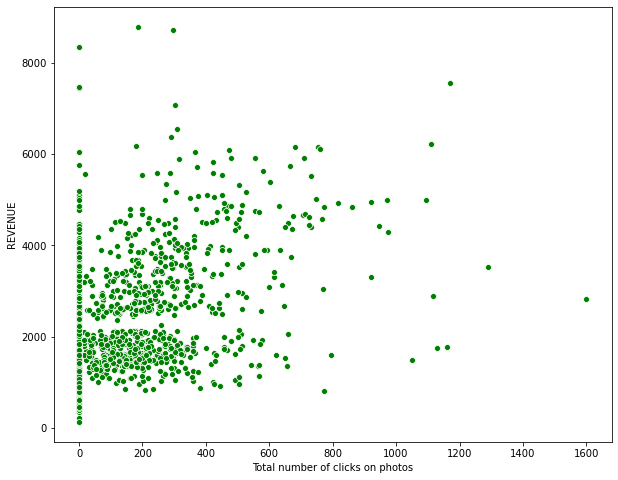

In [55]:
# Total_photos_viewed
fig, ax = plt.subplots(figsize = (10, 8))
sns.scatterplot(x = my_df_dropped['TOTAL_PHOTOS_VIEWED'], y = my_df_dropped['REVENUE'], color = 'green')
plt.xlabel("Total number of clicks on photos")
plt.show()

I will use the same approach to analyze each numeric variable for changes in trends. Before I plot all numeric variables, I will show my thought process of analyzing an example variable - TOTAL_PHOTOS_VIEWED.

<b> Example variable analysis - TOTAL_PHOTOS_VIEWED </b>

TOTAL_PHOTOS_VIEWED scatter plot contains 2 trends. The first trend is zero-inflated; most data points have a value of 0. The second trend lies in data points that scatter towards the right in the similar direction, slowly fanning out. The amount of data points that fan out from the 0-inflated trend is significant, and can therefore be categorized as a valid second trend. Conclusively, the TOTAL_PHOTOS_VIEWED variable contains 2 trends. 

Using the approach described on an example variable above, I will analyze the remaining plots in a similar fashion. The code block below creates a plot to visualize distribution of values for each numeric variable.

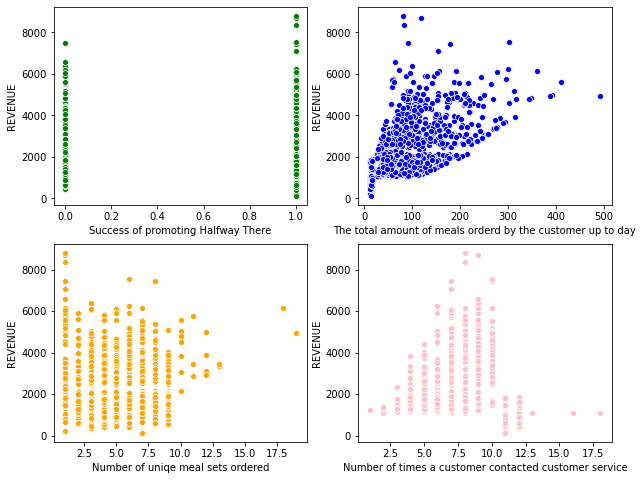

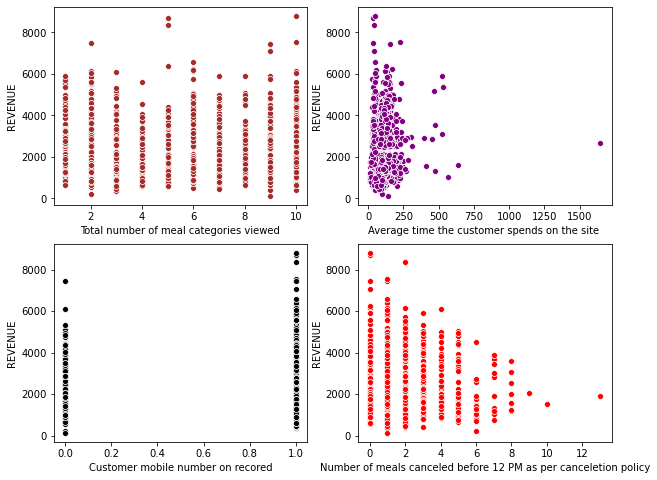

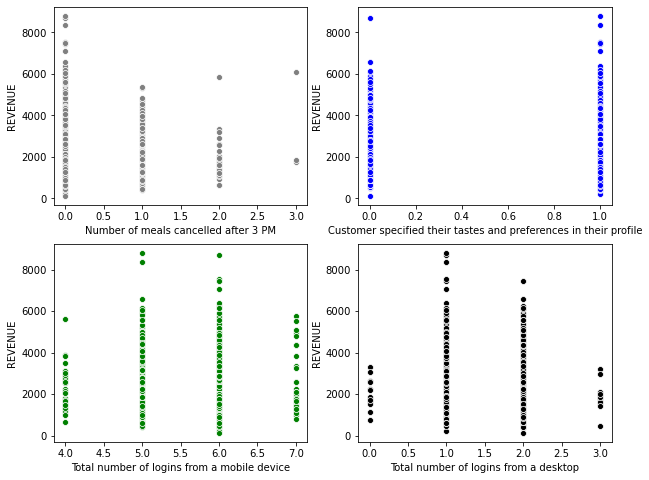

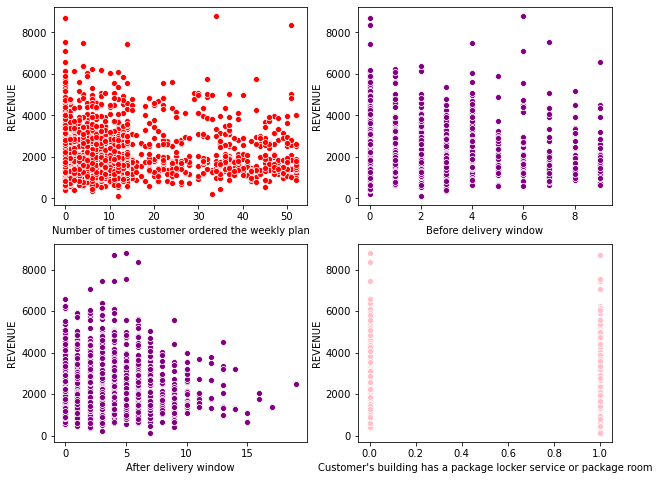

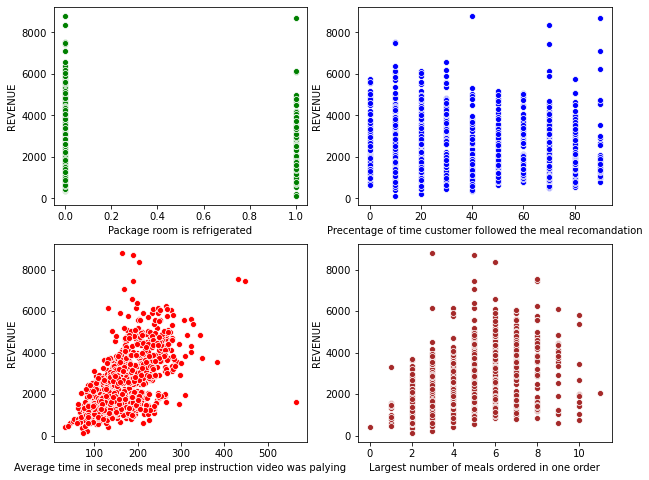

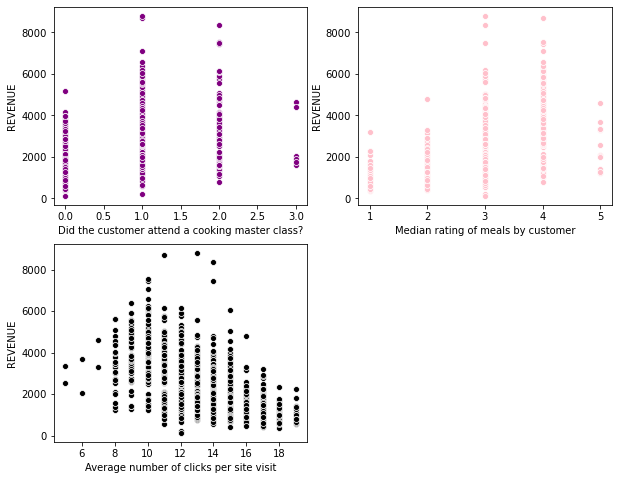

In [56]:
# Plotting scatter plots to evaluate changes in trends

# Cross_sell_success
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_df_dropped['CROSS_SELL_SUCCESS'], y = my_df_dropped['REVENUE'], color = 'g')
plt.xlabel('Success of promoting Halfway There')

# Total_meals_ordered
plt.subplot(2, 2, 2)
sns.scatterplot(x = my_df_dropped['TOTAL_MEALS_ORDERED'], y = my_df_dropped['REVENUE'], color = 'blue')
plt.xlabel('The total amount of meals orderd by the customer up to day')

# Unique_meals_purch
plt.subplot(2, 2, 3)
sns.scatterplot(x = my_df_dropped['UNIQUE_MEALS_PURCH'], y = my_df_dropped['REVENUE'], color = 'orange')
plt.xlabel('Number of uniqe meal sets ordered')

# Contacts_w_customer_service
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_df_dropped['CONTACTS_W_CUSTOMER_SERVICE'], y = my_df_dropped['REVENUE'], color = 'pink')
plt.xlabel('Number of times a customer contacted customer service')

# Product_categories_viewed
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_df_dropped['PRODUCT_CATEGORIES_VIEWED'], y = my_df_dropped['REVENUE'], color = 'brown')
plt.xlabel('Total number of meal categories viewed')

# Avg_time_per_site_visit
plt.subplot(2, 2, 2)
sns.scatterplot(x = my_df_dropped['AVG_TIME_PER_SITE_VISIT'], y = my_df_dropped['REVENUE'], color = 'purple')
plt.xlabel('Average time the customer spends on the site ')

# Mobile_number
plt.subplot(2, 2, 3)
sns.scatterplot(x = my_df_dropped['MOBILE_NUMBER'], y = my_df_dropped['REVENUE'], color = 'black')
plt.xlabel('Customer mobile number on recored')

# Cancellations_before_noon
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_df_dropped['CANCELLATIONS_BEFORE_NOON'], y = my_df_dropped['REVENUE'], color = 'red')
plt.xlabel('Number of meals canceled before 12 PM as per canceletion policy')

# Cancellations_after_noon
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_df_dropped['CANCELLATIONS_AFTER_NOON'], y = my_df_dropped['REVENUE'], color = 'grey')
plt.xlabel('Number of meals cancelled after 3 PM')

# Tastes_and_preferences
plt.subplot(2, 2, 2)
sns.scatterplot(x = my_df_dropped['TASTES_AND_PREFERENCES'], y = my_df_dropped['REVENUE'], color = 'blue')
plt.xlabel('Customer specified their tastes and preferences in their profile')

# Mobile_logins
plt.subplot(2, 2, 3)
sns.scatterplot(x = my_df_dropped['MOBILE_LOGINS'], y = my_df_dropped['REVENUE'], color = 'green')
plt.xlabel('Total number of logins from a mobile device')

# Pc_logins
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_df_dropped['PC_LOGINS'], y = my_df_dropped['REVENUE'], color = 'black')
plt.xlabel('Total number of logins from a desktop')

# Weekly_plan
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_df_dropped['WEEKLY_PLAN'], y = my_df_dropped['REVENUE'], color = 'red')
plt.xlabel('Number of times customer ordered the weekly plan')

# Early_deliveries
plt.subplot(2, 2, 2)
sns.scatterplot(x = my_df_dropped['EARLY_DELIVERIES'], y = my_df_dropped['REVENUE'], color = 'purple')
plt.xlabel('Before delivery window')

# Late_deliveries
plt.subplot(2, 2, 3)
sns.scatterplot(x = my_df_dropped['LATE_DELIVERIES'], y = my_df_dropped['REVENUE'], color = 'purple')
plt.xlabel('After delivery window')

# Package_locker
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_df_dropped['PACKAGE_LOCKER'], y = my_df_dropped['REVENUE'], color = 'pink')
plt.xlabel("Customer's building has a package locker service or package room")

# Refrigerated_locker
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_df_dropped['REFRIGERATED_LOCKER'], y = my_df_dropped['REVENUE'], color = 'green')
plt.xlabel("Package room is refrigerated")

# Followed_recommendations_pct
plt.subplot(2, 2, 2)
sns.scatterplot(x = my_df_dropped['FOLLOWED_RECOMMENDATIONS_PCT'], y = my_df_dropped['REVENUE'], color = 'blue')
plt.xlabel("Precentage of time customer followed the meal recomandation")

# Avg_prep_vid_time
plt.subplot(2, 2, 3)
sns.scatterplot(x = my_df_dropped['AVG_PREP_VID_TIME'], y = my_df_dropped['REVENUE'], color = 'red')
plt.xlabel("Average time in seconeds meal prep instruction video was palying")

# Largest_order_size
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_df_dropped['LARGEST_ORDER_SIZE'], y = my_df_dropped['REVENUE'], color = 'brown')
plt.xlabel("Largest number of meals ordered in one order")

# Master_classes_attended
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_df_dropped['MASTER_CLASSES_ATTENDED'], y = my_df_dropped['REVENUE'], color = 'purple')
plt.xlabel("Did the customer attend a cooking master class?")

# Median_meal_rating
plt.subplot(2, 2, 2)
sns.scatterplot(x = my_df_dropped['MEDIAN_MEAL_RATING'], y = my_df_dropped['REVENUE'], color = 'pink')
plt.xlabel("Median rating of meals by customer")

# Avg_clicks_per_visit
plt.subplot(2, 2, 3)
sns.scatterplot(x = my_df_dropped['AVG_CLICKS_PER_VISIT'], y = my_df_dropped['REVENUE'], color = 'black')
plt.xlabel("Average number of clicks per site visit")
plt.show()

The code above outputs scatter plots to help me analyze trend-based changes in all numeric variables. 


I have already described my approach to analyzing changes in trends in each numeric variable earlier. Now that I have visually identified outliers for all variables, I will answer an important question - how did I determine my changes in trends?

<b>How to identify trends in variables</b>

Similar to outlier analysis, there is no one right way to identify trends. Therefore, the best approach is to use your common sense. If after plotting scatter plots you notice that values have 2 or more distinct patterns, set trend-based thresholds for these trends. If you notice just 1 major trend, consider leaving such column as is. If you apply your common sense, you are unlikely to be questioned on your decision later. With that being said, be detail-oriented in your analysis, and don't mistakingly miss a multi-trend variable. 


In the next coding block, I will create trend-based thresholds at points where I identified changes in trends.

In [57]:
# Setting trend-based thresholds
total_meals_ordered_change_hi = 250        # data scatters above this point
avg_time_per_site_visit_change_hi = 500    # data scatters above this point

weekly_plan_change_at = 0                  # zero inflated
total_photos_viewed_change_at = 0          # zero inflated

Similar to outlier analysis procedure, the next coding block uses the above trend-based thresholds to develop additional variables. Thanks to these additional variables capturing separate trends, I will be able to fairly analyze the importance of each trend on predicting revenue.

In [58]:
# Feature engineering - trend changes

### CHANGE ABOVE thresholds

# Change_total_meals_ordered
my_df_dropped['CHANGE_TOTAL_MEALS_ORDERED'] = 0
condition = my_df_dropped.loc[0:, "CHANGE_TOTAL_MEALS_ORDERED"][my_df_dropped['TOTAL_MEALS_ORDERED'] > total_meals_ordered_change_hi]
my_df_dropped['CHANGE_TOTAL_MEALS_ORDERED'].replace(to_replace = condition, value = 1, inplace = True)

#Change_avg_time_per_site_visit
my_df_dropped['CHANGE_AVG_TIME_PER_SITE_VISIT'] = 0
condition = my_df_dropped.loc[0:, "CHANGE_AVG_TIME_PER_SITE_VISIT"][my_df_dropped['AVG_TIME_PER_SITE_VISIT'] > avg_time_per_site_visit_change_hi]
my_df_dropped['CHANGE_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition, value = 1, inplace = True)

### CHANGE AT thresholds

# Change_weekly_plan
my_df_dropped['CHANGE_WEEKLY_PLAN'] = 0
condition = my_df_dropped.loc[0:, "CHANGE_WEEKLY_PLAN"][my_df_dropped['WEEKLY_PLAN'] == weekly_plan_change_at]
my_df_dropped['CHANGE_WEEKLY_PLAN'].replace(to_replace = condition, value = 1, inplace = True)

# Change_total_photos_viewed
my_df_dropped['CHANGE_TOTAL_PHOTOS_VIEWED'] = 0
condition = my_df_dropped.loc[0:, "CHANGE_TOTAL_PHOTOS_VIEWED"][my_df_dropped['TOTAL_PHOTOS_VIEWED'] == total_photos_viewed_change_at]
my_df_dropped['CHANGE_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition, value = 1, inplace = True)

/Users/arseniybarmin/.conda/envs/blue/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/arseniybarmin/.conda/envs/blue/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/arseniybarmin/.conda/envs/blue/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Now that I created additional variables to capture separate trends, this concludes the trend-based analysis of my dataset. Now, I am ready to build predictive models.

___

### Building Predictive Models

Before I build predictive models,  I will observe the results of my feature engineering analysis. To do that, I will develop a code to view a Pearson correlation matrix with data rounded to 2 decimal places. 

In [59]:
my_df_dropped_corr = my_df_dropped.corr().round(2)

print(my_df_dropped_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                            1.00
AVG_PREP_VID_TIME                  0.65
MEDIAN_MEAL_RATING                 0.61
TOTAL_MEALS_ORDERED                0.60
TOTAL_PHOTOS_VIEWED                0.47
MASTER_CLASSES_ATTENDED            0.45
LARGEST_ORDER_SIZE                 0.44
OUT_TOTAL_MEALS_ORDERED            0.42
OUT_AVG_PREP_VID_TIME              0.40
OUT_TOTAL_PHOTOS_VIEWED            0.37
OUT_AVG_CLICKS_PER_VISIT           0.34
CHANGE_TOTAL_MEALS_ORDERED         0.27
OUT_MASTER_CLASSES_ATTENDED        0.22
OUT_UNIQUE_MEALS_PURCH             0.17
AVG_TIME_PER_SITE_VISIT            0.14
OUT_LARGEST_ORDER_SIZE             0.12
CONTACTS_W_CUSTOMER_SERVICE        0.11
CHANGE_AVG_TIME_PER_SITE_VISIT     0.06
MOBILE_NUMBER                      0.04
PRODUCT_CATEGORIES_VIEWED          0.03
CHANGE_WEEKLY_PLAN                 0.03
OUT_WEEKLY_PLAN                    0.03
OUT_AVG_TIME_PER_SITE_VISIT        0.02
OUT_MOBILE_LOGINS                  0.02
CROSS_SELL_SUCCESS                 0.01


The correlations above justify the time I spent on feature engineering. According to the Pearson correlation matrix, some feature-engineered are significantly correlated to revenue. Specifically, a correlation is observed between REVENUE response variable and the following feature-engineered explanatory variables:

- OUT_TOTAL_MEALS_ORDERED
- OUT_AVG_PREP_VIDEO_TIME
- OUT_TOTAL_PHOTOS_VIEWED
- OUT_AVG_CLICKS_PER_VISIT

Although correlations are observed between these feature-engineered variables and revenue, I don't know yet if they will be statistically significant to include in my model building to predict revenue. For now, those are just observations. 

Next, I will save my dataset and drop the response variable from the dataset for now. After, I will run a for loop to print my explanatory variables that will be easy to copy-paste in my analysis later. 

In [60]:
# saving feature_rich dataset 
my_df_dropped.to_excel('my_df_feature_rich.xlsx', index = False)

# dropping REVENUE variable from the explanatory variable set
my_df_explanatory = my_df_dropped.drop(['REVENUE'], axis = 1)

# formatting each explanatory variable for statsmodels
for val in my_df_explanatory:
    print(f"my_df_dropped['{val}'] +")

my_df_dropped['CROSS_SELL_SUCCESS'] +
my_df_dropped['NAME'] +
my_df_dropped['EMAIL'] +
my_df_dropped['FIRST_NAME'] +
my_df_dropped['FAMILY_NAME'] +
my_df_dropped['TOTAL_MEALS_ORDERED'] +
my_df_dropped['UNIQUE_MEALS_PURCH'] +
my_df_dropped['CONTACTS_W_CUSTOMER_SERVICE'] +
my_df_dropped['PRODUCT_CATEGORIES_VIEWED'] +
my_df_dropped['AVG_TIME_PER_SITE_VISIT'] +
my_df_dropped['MOBILE_NUMBER'] +
my_df_dropped['CANCELLATIONS_BEFORE_NOON'] +
my_df_dropped['CANCELLATIONS_AFTER_NOON'] +
my_df_dropped['TASTES_AND_PREFERENCES'] +
my_df_dropped['MOBILE_LOGINS'] +
my_df_dropped['PC_LOGINS'] +
my_df_dropped['WEEKLY_PLAN'] +
my_df_dropped['EARLY_DELIVERIES'] +
my_df_dropped['LATE_DELIVERIES'] +
my_df_dropped['PACKAGE_LOCKER'] +
my_df_dropped['REFRIGERATED_LOCKER'] +
my_df_dropped['FOLLOWED_RECOMMENDATIONS_PCT'] +
my_df_dropped['AVG_PREP_VID_TIME'] +
my_df_dropped['LARGEST_ORDER_SIZE'] +
my_df_dropped['MASTER_CLASSES_ATTENDED'] +
my_df_dropped['MEDIAN_MEAL_RATING'] +
my_df_dropped['AVG_CLICKS_PER_VISIT

Now that I have all my variables printed in the format that I can easily copy-paste, I will next create a full Ordinary Least Squares model containing all variables.

In [61]:
lm_full = smf.ols(formula = """
my_df_dropped['REVENUE'] ~
                          my_df_dropped['CROSS_SELL_SUCCESS'] +
                          my_df_dropped['TOTAL_MEALS_ORDERED'] +
                          my_df_dropped['UNIQUE_MEALS_PURCH'] +
                          my_df_dropped['CONTACTS_W_CUSTOMER_SERVICE'] +
                          my_df_dropped['PRODUCT_CATEGORIES_VIEWED'] +
                          my_df_dropped['AVG_TIME_PER_SITE_VISIT'] +
                          my_df_dropped['MOBILE_NUMBER'] +
                          my_df_dropped['CANCELLATIONS_BEFORE_NOON'] +
                          my_df_dropped['CANCELLATIONS_AFTER_NOON'] +
                          my_df_dropped['TASTES_AND_PREFERENCES'] +
                          my_df_dropped['MOBILE_LOGINS'] +
                          my_df_dropped['PC_LOGINS'] +
                          my_df_dropped['WEEKLY_PLAN'] +
                          my_df_dropped['EARLY_DELIVERIES'] +
                          my_df_dropped['LATE_DELIVERIES'] +
                          my_df_dropped['PACKAGE_LOCKER'] +
                          my_df_dropped['REFRIGERATED_LOCKER'] +
                          my_df_dropped['FOLLOWED_RECOMMENDATIONS_PCT'] +
                          my_df_dropped['AVG_PREP_VID_TIME'] +
                          my_df_dropped['LARGEST_ORDER_SIZE'] +
                          my_df_dropped['MASTER_CLASSES_ATTENDED'] +
                          my_df_dropped['MEDIAN_MEAL_RATING'] +
                          my_df_dropped['AVG_CLICKS_PER_VISIT'] +
                          my_df_dropped['TOTAL_PHOTOS_VIEWED'] +
                          my_df_dropped['m_FAMILY_NAME'] +
                          my_df_dropped['OUT_TOTAL_MEALS_ORDERED'] +
                          my_df_dropped['OUT_UNIQUE_MEALS_PURCH'] +
                          my_df_dropped['OUT_CONTACTS_W_CUSTOMER_SERVICE'] +
                          my_df_dropped['OUT_AVG_TIME_PER_SITE_VISIT'] +
                          my_df_dropped['OUT_CANCELLATIONS_BEFORE_NOON'] +
                          my_df_dropped['OUT_CANCELLATIONS_AFTER_NOON'] +
                          my_df_dropped['OUT_MOBILE_LOGINS'] +
                          my_df_dropped['OUT_PC_LOGINS'] +
                          my_df_dropped['OUT_WEEKLY_PLAN'] +
                          my_df_dropped['OUT_EARLY_DELIVERIES'] +
                          my_df_dropped['OUT_LATE_DELIVERIES'] +
                          my_df_dropped['OUT_REFRIGERATED_LOCKER'] +
                          my_df_dropped['OUT_AVG_PREP_VID_TIME'] +
                          my_df_dropped['OUT_LARGEST_ORDER_SIZE'] +
                          my_df_dropped['OUT_MASTER_CLASSES_ATTENDED'] +
                          my_df_dropped['OUT_MEDIAN_MEAL_RATING'] +
                          my_df_dropped['OUT_AVG_CLICKS_PER_VISIT'] +
                          my_df_dropped['OUT_TOTAL_PHOTOS_VIEWED'] +
                          my_df_dropped['CHANGE_TOTAL_MEALS_ORDERED'] +
                          my_df_dropped['CHANGE_AVG_TIME_PER_SITE_VISIT'] +
                          my_df_dropped['CHANGE_WEEKLY_PLAN'] +
                          my_df_dropped['CHANGE_TOTAL_PHOTOS_VIEWED']

""",
                                data = my_df_dropped)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     my_df_dropped['REVENUE']   R-squared:                       0.655
Model:                                  OLS   Adj. R-squared:                  0.647
Method:                       Least Squares   F-statistic:                     80.08
Date:                      Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                              09:22:55   Log-Likelihood:                -15051.
No. Observations:                      1899   AIC:                         3.019e+04
Df Residuals:                          1854   BIC:                         3.044e+04
Df Model:                                44                                         
Covariance Type:                  nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                          111.6240    240.877      0.463      0.643    -360.795     584.043
my_df_dropped['CROSS_SELL_SUCCESS']                -54.7562     38.898     -1.408      0.159    -131.045      21.533
my_df_dropped['TOTAL_MEALS_ORDERED']                 5.1130      0.567      9.014      0.000       4.001       6.225
my_df_dropped['UNIQUE_MEALS_PURCH']                -67.8144      6.667    -10.172      0.000     -80.890     -54.739
my_df_dropped['CONTACTS_W_CUSTOMER_SERVICE']        55.2498      8.603      6.422      0.000      38.378      72.122
my_df_dropped['PRODUCT_CATEGORIES_VIEWED']           6.2177      5.200      1.196      0.232      -3.981      16.416
my_df_dropped['AVG_TIME_PER_SITE_VISIT']            -0.8934      0.398     -2.243      0.025      -1.674      -0.112
my_df_dropped['MOBILE_NUMBER']                      22.7722     48.370      0.471      0.638     -72.094     117.638
my_df_dropped['CANCELLATIONS_BEFORE_NOON']           1.0095     17.327      0.058      0.954     -32.973      34.992
my_df_dropped['CANCELLATIONS_AFTER_NOON']           15.2512    105.510      0.145      0.885    -191.680     222.183
my_df_dropped['TASTES_AND_PREFERENCES']             21.9827     34.999      0.628      0.530     -46.659      90.625
my_df_dropped['MOBILE_LOGINS']                       2.9604     26.992      0.110      0.913     -49.978      55.899
my_df_dropped['PC_LOGINS']                         -33.0190     29.864     -1.106      0.269     -91.589      25.551
my_df_dropped['WEEKLY_PLAN']                        -0.5175      2.635     -0.196      0.844      -5.684       4.649
my_df_dropped['EARLY_DELIVERIES']                    0.8034     11.465      0.070      0.944     -21.683      23.290
my_df_dropped['LATE_DELIVERIES']                    -2.5034      9.658     -0.259      0.796     -21.445      16.438
my_df_dropped['PACKAGE_LOCKER']                    -13.4214     37.418     -0.359      0.720     -86.807      59.965
my_df_dropped['REFRIGERATED_LOCKER']               -14.7779     28.186     -0.524      0.600     -70.058      40.502
my_df_dropped['FOLLOWED_RECOMMENDATIONS_PCT']       -0.1003      0.674     -0.149      0.882      -1.423       1.222
my_df_dropped['AVG_PREP_VID_TIME']                   8.8476      0.699     12.664      0.000       7.477      10.218
my_df_dropped['LARGEST_ORDER_SIZE']                -98.3528     17.398     -5.653      0.000    -132.475     -64.230
my_df_dropped['MASTER_CLASSES_ATTENDED']           175.9263     37.654      4.672      0.000     102.078     249.774
my_df_dropped['MEDIAN_MEAL_RATING']                286.4504     49.115      5.832      0.000

According to the p-values of each variable, some variables are statistically significant, and others are not. Statistically significant variables have p-values of 0.05 or lower. Variables that have p-values above 0.05 are deemed statistically insignificant, and I will therefore remove them one by one, starting with the variable with the highest p-value. After each time I will remove a variable, I will re-run the code above to see how p-values change with decreased number of variables. I will continue this process until only statistically significant variables remain.

In [62]:
# Building a full model

# creating a model by removing one insignificant variable at a time
lm_full = smf.ols(formula = """
my_df_dropped['REVENUE'] ~
                           my_df_dropped['TOTAL_MEALS_ORDERED'] +
                           my_df_dropped['UNIQUE_MEALS_PURCH'] +
                           my_df_dropped['CONTACTS_W_CUSTOMER_SERVICE'] +
                           my_df_dropped['AVG_TIME_PER_SITE_VISIT'] +
                           my_df_dropped['AVG_PREP_VID_TIME'] +
                           my_df_dropped['LARGEST_ORDER_SIZE'] +
                           my_df_dropped['MASTER_CLASSES_ATTENDED'] +
                           my_df_dropped['MEDIAN_MEAL_RATING'] +
                           my_df_dropped['TOTAL_PHOTOS_VIEWED'] +
                           my_df_dropped['OUT_UNIQUE_MEALS_PURCH'] +
                           my_df_dropped['OUT_CONTACTS_W_CUSTOMER_SERVICE'] +
                           my_df_dropped['OUT_AVG_CLICKS_PER_VISIT'] +
                           my_df_dropped['CHANGE_TOTAL_MEALS_ORDERED']

""",
                                data = my_df_dropped)
# After removing many variables that had p-values at above 0.05, the above are 
# the main variables remaining that are statistically significant. Even though
# Rˆ2 value is just at 0.651, the p-values of all remaining valriables are significant,
# which is why the above will be used for training and testing multiple models
# to find the best fitting algorithm

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     my_df_dropped['REVENUE']   R-squared:                       0.651
Model:                                  OLS   Adj. R-squared:                  0.649
Method:                       Least Squares   F-statistic:                     270.7
Date:                      Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                              09:22:55   Log-Likelihood:                -15062.
No. Observations:                      1899   AIC:                         3.015e+04
Df Residuals:                          1885   BIC:                         3.023e+04
Df Model:                                13                                         
Covariance Type:                  nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                         -387.3091     93.553     -4.140      0.000    -570.787    -203.831
my_df_dropped['TOTAL_MEALS_ORDERED']                 5.2146      0.414     12.584      0.000       4.402       6.027
my_df_dropped['UNIQUE_MEALS_PURCH']                -67.7027      6.541    -10.350      0.000     -80.532     -54.874
my_df_dropped['CONTACTS_W_CUSTOMER_SERVICE']        55.5778      8.372      6.638      0.000      39.158      71.998
my_df_dropped['AVG_TIME_PER_SITE_VISIT']            -0.6573      0.262     -2.512      0.012      -1.171      -0.144
my_df_dropped['AVG_PREP_VID_TIME']                   9.3231      0.626     14.890      0.000       8.095      10.551
my_df_dropped['LARGEST_ORDER_SIZE']               -101.5439     16.938     -5.995      0.000    -134.763     -68.325
my_df_dropped['MASTER_CLASSES_ATTENDED']           167.7447     28.349      5.917      0.000     112.147     223.343
my_df_dropped['MEDIAN_MEAL_RATING']                348.8486     26.192     13.319      0.000     297.479     400.218
my_df_dropped['TOTAL_PHOTOS_VIEWED']                 0.6657      0.100      6.670      0.000       0.470       0.861
my_df_dropped['OUT_UNIQUE_MEALS_PURCH']            641.8302    185.677      3.457      0.001     277.677    1005.983
my_df_dropped['OUT_CONTACTS_W_CUSTOMER_SERVICE']  -192.4072     52.510     -3.664      0.000    -295.392     -89.423
my_df_dropped['OUT_AVG_CLICKS_PER_VISIT']          356.6275     49.144      7.257      0.000     260.244     453.010
my_df_dropped['CHANGE_TOTAL_MEALS_ORDERED']       -324.1719    158.153     -2.050      0.041    -634.345     -13.999
==============================================================================
Omnibus:                      711.539   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8246.151
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                      12.804   Cond. No.                     3.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The summary above shows that the model now only contains statistically significant variables.

Interesting to note, my first hypothesis was wrong. I assumed that outliers of the TOTAL_MEALS_ORDERED column will prove to be statistically significant. However, this was not the case, as this variable's p-value was greater than 0.05. By contrast, TOTAL_MEALS_ORDERED proved to be statistically significant.

Now that I have a model that exclusively contains statistically significant variables, I will next split the data into training and testing sets.

In the example above where I was building an ordinary least squares model, I allowed for one major drawback; I trained my OLS model on my entire dataset. This will give me an idea how my model performs on the training set - the entire data - but I cannot test it on the data it hasn't seen before. To avoid this drawback, I will split my feature-engineered data into 2 parts; the training part and the testing part. That way, I can train my model on a portion of my data, and test its performance on previously unseen data by exposing it to my testing set once the model is trained. 

To do this, the next coding block identifies all my explanatory variables, and then stores them as a data frame called <i>my_df_data</i>. Then, I will also define a dataframe called <i>my_df_target</i> containing my response variable - REVENUE.

In [63]:
# preparing explanatory variables
x_variables = ['TOTAL_MEALS_ORDERED',
                               'UNIQUE_MEALS_PURCH',
                               'CONTACTS_W_CUSTOMER_SERVICE',
                               'AVG_TIME_PER_SITE_VISIT',
                               'AVG_PREP_VID_TIME',
                               'LARGEST_ORDER_SIZE',
                               'MASTER_CLASSES_ATTENDED',
                               'MEDIAN_MEAL_RATING',
                               'TOTAL_PHOTOS_VIEWED',
                               'OUT_UNIQUE_MEALS_PURCH',
                               'OUT_CONTACTS_W_CUSTOMER_SERVICE',
                               'OUT_AVG_CLICKS_PER_VISIT',
                               'CHANGE_TOTAL_MEALS_ORDERED']


# Preparing a DataFrame based the the analysis above
my_df_data   = my_df_dropped.loc[ : , x_variables]

# preparing target variable
my_df_target = my_df_dropped.loc[:, 'REVENUE']

Now that I have separated my explanatory variables and my response variable in 2 separate data frames, I can now specify the train-test function, specifying that I want 25% of my data to be left for testing my algorithms, and use the remaining 75% of the data to train them. 

In [64]:
# coding our algorithm with approprite test size and random state
X_train, X_test, y_train, y_test = train_test_split(
            my_df_data,
            my_df_target,
            test_size = 0.25,
            random_state = 802)

Now it is time to experiment with different machine learning models to see which one yields the best results. 

In the code block below, I first instantiate the Linear Regression model. Then, I fit the model on the training portion of my data. Next, I will analyze its performance on the test set that the model has not seen yet. Finally, I will print the training and testing results, as well as save them to compare with other models later.

In [65]:
# Analysing linear regression model to see how the training and testing values
# turn out to be

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

Training Score: 0.6511
Testing Score: 0.6412


The Linear Regression model gives me the training score of 0.6511 and the testing score of 0.6412. I will now show the framework I will use to analyze all the models in this project using the example of Linear Regression model.

<b>How do I read the training score?</b>

The training score for the Linear Regression model is 0.6511. This tells me that my model was 65% accurate in training on my training set. I consider 65% to be a low number; at a minimum, I want my model to show 70% accuracy or more, given my current knowledge of machine learning. There is no specific number that is a rule of thumb for testing performance; 70% is what I identified for myself using my own judgment.

<b>How do I read the testing score?</b>

The testing score for the Linear Regression model is 0.6412. This tells me that my model was 64% accurate in correctly predicting revenue in the test set. 64% prediction accuracy is good, but I would like my prediction accuracy to be higher than that. Again, there is no specific rule of thumb as to what % of prediction accuracy is deemed great. Based on my machine learning skills I developed over the past 2 months, I want my prediction accuracy to be at a rate of 70% or more.

<b>How do I read the combination of training and testing performance?</b>

The training performance and the testing performance are both very close to one another. This tells me that Linear Regression model is not over-fit, and it is not under-fit. Therefore, this model can be considered to potentially be my final model. However, I would like to have a model with training and testing accuracy of at least 70%.

<b>What does it mean when a model is over-fit?</b>

A model is considered over-fit when the training score is higher than the testing score by 0.06 or more. If a model is over-fit, it means that a model trained well on the data, but predicted significantly worse. A model needs to be able to generalize across the training set to capture relevant trends. However, it can happen that a model is not able to generalize, and instead tries to capture as much information as it can when it trains. This makes a model vulnerable to the noise in the training data. By noise, I mean that the model tries to learn from  data points that are far from the general trend in the training set. In this case, the model over-generalizes, and learns too much when training. Conclusively, over-fitting takes place when a model is trying to learn too much from the training set, rather than generalizing relevant trends and patterns. 

<b> What does it mean when a model is under-fit?</b>

A model is under-fit when the testing score is higher than the training score by 0.06 or more. In this case, it means that a model may have missed on some trends and patterns in the training data, which can jeopardize the predicting performance on the longer-term. Under-fitting happens much less often than over-fitting.

<b> Why is it important to consider over-fitting and under-fitting?</b>

Machine learning models are created to be deployed in production environments. If a model is over-fit, it means it failed to generalize trends and patterns well. In this case, a model will perform poor on predictions. Even if it does well at first, as in the case of under-fitting, the model will at some point backfire and return poor results. In business context, this means that the model can make many false business decisions and ultimately destroy a business. Therefore, it is very important to make sure that the model is neither over-fit, nor under-fit, prior to deploying it in production.

<b> My conclusion of the Linear Regression model </b>

Linear Regression model is worthy model. This model trains with 65% accuracy and predicts with 64% accuracy. This model is neither over-fit, nor under-fit. Therefore, it is worthy to be considered for deployment. In regards to its training and testing performance, I am not satisfied with its scores. Given my machine learning skills after studying the subject for 2 months, I consider a model credible if it is neither over-fit, nor under-fit, and trains and tests at above 70%. Conclusively, I will explore more models to find the one that trains and test at higher accuracy rates. 


<b>I will apply the framework above to all machine learning models I will explore.</b> 

Next, I will explore the k-Nearest Neighbors model. To do that, I need to first scale my data, due to the nature of the KNN model. KNN is a distance-based model, meaning that it is essential to have all variables on the same scale prior to running the KNN model. Scaled data will ensure that KNN considers all variables on the basis of equal importance. Otherwise, the KNN model may give certain variables unjustified advantage over others. 

In [66]:
### STANDARDIZING FOR MODELLING ###

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(my_df_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(my_df_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00
mean,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.15,-1.56,-2.63,-1.42,-2.36,-2.84,-0.94,-2.37,-0.59,-0.10,-0.46,-0.40,-0.13
25%,-0.65,-0.76,-0.87,-0.44,-0.73,-0.92,-0.94,-1.05,-0.59,-0.10,-0.46,-0.40,-0.13
50%,-0.27,0.04,0.01,-0.09,-0.10,-0.28,0.61,0.27,-0.59,-0.10,-0.46,-0.40,-0.13
75%,0.37,0.84,0.45,0.28,0.47,0.36,0.61,0.27,0.38,-0.10,-0.46,-0.40,-0.13
max,7.55,5.63,4.85,24.58,8.31,4.20,3.72,2.91,8.27,9.95,2.16,2.49,7.64


For sanity check, I check the above results and see that data was indeed scaled; across all variables the mean is 0 and the standard deviation is 1. In the next coding block I will copy-paste the column names from original data to preserve the readability of my data.

In [67]:
# adding labels to the scaled DataFrame
X_scaled_df.columns = my_df_data.columns

Now that we have our explanatory variables scaled, it is important to execute train-test split again, this time using scaled data that I will use for distance-sensitive models, such as KNN.

In [68]:
# coding in train_test_split

X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            my_df_target,
            test_size = 0.25,
            random_state = 802)

Now that I know my models will be considering scaled data, my next step is to determine the optimal number of neighbors to use for the KNN model.

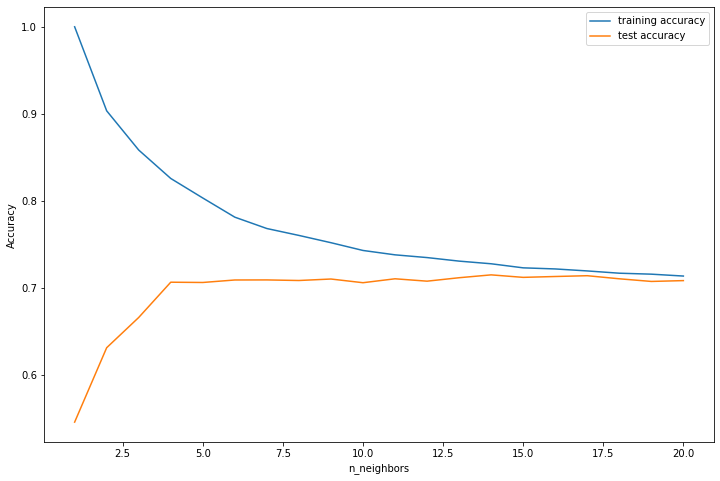

The optimal number of neighbors is 14


In [69]:
# Determining the optimal k-values for standardized case

# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

Now that I have my optimal number of neighbors, I am ready to run the KNN algorithm and analyze its performance.

In [70]:
# training and testing model based on the most optimal k-value; 14

# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_stand.fit(X_train, y_train)



# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test)



# SCORING the results
print('Training Score:', knn_stand.score(X_train, y_train).round(4))
print('Testing Score:',  knn_stand.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train, y_train).round(4)
knn_stand_score_test  = knn_stand.score(X_test, y_test).round(4)

Training Score: 0.7277
Testing Score: 0.7149


The KNN model performs well. It is neither over-fit, nor it is under-fit. Both training and testing performances are above 70%, which is a credible score; I want a model to perform at least 70% accurately. The KNN also performs better than the Linear Regression model. Therefore, the KNN is currently the best model I have. 

I will next run several more models to compare among different models and identify my best performing one. I will next run the Ridge Regression model.

In [71]:
# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

Training Score: 0.6511
Testing Score: 0.6414


The Ridge Regression model is neither over-fit, nor it is under-fit. However, the training and testing accuracy are inferior to the results of the KNN model. Therefore, let's next consider Lasso Regression model to see if it performs better than the KNN model.

In [72]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_model.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

Training Score: 0.6511
Testing Score: 0.6417


The Lasso Regression model performs almost identical to Ridge Regression model in my assignment, with a slight difference in the testing score. Even though it is neither over-fit nor under-fit, it still performs worse than the KNN. Therefore, let's next consider the ARD Regression model to see if it can do better than the KNN model.

In [73]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_model.predict(X_test)


print('Training Score:', ard_model.score(X_train, y_train).round(4))
print('Testing Score:',  ard_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(4)
ard_test_score  = ard_model.score(X_test, y_test).round(4)

Training Score: 0.6508
Testing Score: 0.64


Similar to Ridge and Lasso Regression models, the ARD Regression model is neither over-fit nor under-fit, but still performs worse than the KNN. Next, let's consider the Decision Tree Regressor.

In [74]:
# INSTANTIATING a model object
dt_model = sklearn.tree.DecisionTreeRegressor()

# FITTING the training data
dt_fit = dt_model.fit(X_train, y_train)

# PREDICTING on new data
dt_predict = dt_model.predict(X_test)

print('Training Score:', dt_model.score(X_train, y_train).round(4))
print('Testing Score:',  dt_model.score(X_test, y_test).round(4))

# saving scoring data for future use
dt_train_score = dt_model.score(X_train, y_train).round(4)
dt_test_score  = dt_model.score(X_test, y_test).round(4)

Training Score: 1.0
Testing Score: 0.6286


The Decision Tree Regressor is my worst-performing model so far. It is extremely over-fit, which already eliminates it from consideration for deployment. In addition, its prediction accurcy is only at 60%. Overall, this model is very irrelevant to predicting revenue. 

Finally, let's map the performance of my models against one another to see which one stands out the most. 

In [77]:
# comparing results

print(f"""
Model                 Neighbors     Train Score           Test Score
----------------      ---------     ----------            ----------
OLS                      NA              {lr_train_score}             {lr_test_score}
KNN - st., optimal       14              {knn_stand_score_train}             {knn_stand_score_test}
Ridge                    NA              {ridge_train_score}             {ridge_test_score}
LASSO                    NA              {lasso_train_score}             {lasso_test_score}
ARD                      NA              {ard_train_score}             {ard_test_score}
DT_reg                   NA              {dt_train_score}                {dt_test_score}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'KNN unscaled', 'KNN unscaled optimal', 'Ridge', "LASSO", 'ADR', 'DT_reg'],
           
                     'Training' : [lr_train_score,
                                   knn_stand_score_train, ridge_train_score, lasso_train_score, ard_train_score, 
                                   dt_train_score],
           
                     'Testing'  : [lr_test_score,
                                   knn_stand_score_test, ridge_test_score, lasso_test_score, ard_test_score,
                                   dt_test_score]}


Model                 Neighbors     Train Score           Test Score
----------------      ---------     ----------            ----------
OLS                      NA              0.6511             0.6412
KNN - st., optimal       14              0.7277             0.7149
Ridge                    NA              0.6511             0.6414
LASSO                    NA              0.6511             0.6417
ARD                      NA              0.6508             0.64
DT_reg                   NA              1.0                0.6286



The coding block above compares the models I tested in this assignment. Conclusively, the KNN turned out to be my best model. It is neither over-fit, nor under-fit, and trains and tests at above 70% accuracy. 

### Conclusion - business insights 

The KNN model turns out to perform best out of the 6 models I evaluated. Therefore, my second hypothesis was correct. Indeed, a model that is sensitive to scaling performs best.

<b>Business insight 1</b>

Our food takes 30min to cook from start to finish. Customers spend the most within the first 12 months, and they watch our videos as they cook. Because they watch our videos and enjoy cooking for 30 minutes, we recommend to invest into making videos shorter and shortening the max meal prep time by 5 minutes. After 12 months, we can observe behavior change in regards to revenue generated from customers in first 12 months. If shortened meal prep time and videos yield more revenue than in the last 12 months, this will be a strategy to explore further.

<b>Business insight 2</b>

Customers look closely to median meal rating; there is a strong relationship between the revenue and the median score of the meal. Currently, we optionally offer customers to submit feedback in a form of a survey. Given the data, instead of this, we recommend to be proactive on reaching out to dissatisfied customers to learn about what we can improve. As we address their issues, we can invest time in product development and experience. In return, this will yield higher median meal rating, and therefore higher revenues.

<b>Actionable recommendation</b>

Our current new customer journey include optional weekly meal plan and receiving discount on all orders. After analysis, it is evident that weekly plan initiative yields very little value. Therefore, this initiative is recommended to be terminated. In place of investing into the weekly plan initiative, the data shows that it makes more sense to reallocate the money from going into the discounts and weekly plans to developing shorter meal prep videos and shortening the cooking time. Our concept is fast meal prep for yourself, and customers resonate with that mission. Doubling down on our mission and shortening the meal prep time can help us generate more revenue from customers, and keep them shopping with us actively for longer than 12 months.